In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load your hydro power plant data from CSV into a pandas DataFrame
power_plants = pd.read_csv('C:/Users/hp/Desktop/hydro_dist.csv')

power_plants.head()

,country,country_lo,name,gppd_idnr,capacity_m,latitude,longitude,primary_fu,other_fuel,other_fu_1,...,estimate_2,estimate_3,estimate_4,estimate_5,estimate_6,estimate_7,estimate_8,estimate_9,HubName,HubDist
0,ITA,Italy,ACCEGLIO,WRI1021706,19.0,44.4742,7.0183,Hydro,NaN,NaN,...,46.09,55.36,36.73,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,River/Stream,5.122053
1,ITA,Italy,ANAPO C.LE,WRI1002846,500.0,37.1183,15.1394,Hydro,NaN,NaN,...,750.05,1251.90,354.38,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,River/Stream,6.403931
2,ITA,Italy,ARDENNO,WRI1021354,56.0,46.1507,9.6301,Hydro,NaN,NaN,...,173.14,184.96,118.15,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,River/Stream,2.587410
3,ITA,Italy,AVISE,WRI1002850,126.5,45.7089,7.1399,Hydro,NaN,NaN,...,310.04,375.29,240.10,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,River/Stream,10.229909
4,ITA,Italy,BARGI CENTRALE,WRI1002852,281.0,44.1705,11.0888,Hydro,NaN,NaN,...,660.57,822.09,464.17,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,River/Stream,3.222263


In [5]:
# Extract the latitude and longitude coordinates of the power plants
latitude = power_plants['latitude']
longitude = power_plants['longitude']

# Calculate the kernel density estimate using gaussian_kde
kde = gaussian_kde([latitude, longitude])

In [6]:
# Define the grid of points for the heatmap
x_grid, y_grid = np.mgrid[min(latitude):max(latitude):100j, min(longitude):max(longitude):100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the KDE at each point on the grid
kde_values = kde(positions)

# Reshape the KDE values to match the grid shape
kde_values = kde_values.reshape(x_grid.shape)

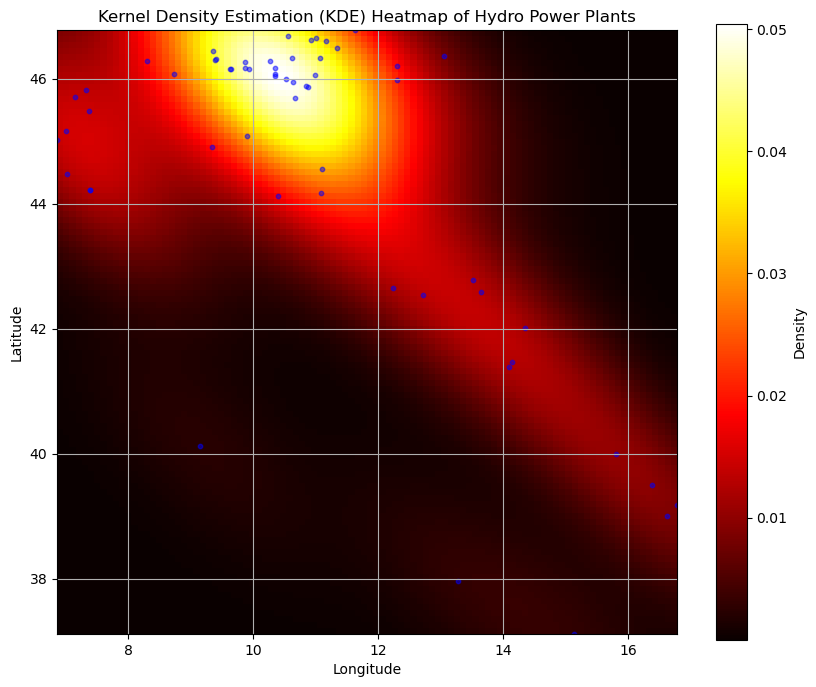

In [7]:
# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(kde_values, cmap='hot', origin='lower', extent=[min(longitude), max(longitude), min(latitude), max(latitude)])
plt.colorbar(label='Density')
plt.scatter(longitude, latitude, color='blue', s=10, alpha=0.5)  # Scatter plot of power plant locations
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kernel Density Estimation (KDE) Heatmap of Hydro Power Plants')
plt.grid(True)
plt.show()
